Starter code for SVM assignment. If you have any question, please contact the instructor and TAs for clarification.

In [1]:
# Load the libaries dataset
# When you load the datasets, please select both training and testing files at "Choose Files" and click "Open"
# You could add other necessary libraries here
import pandas as pd
import numpy as np
from google.colab import files

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
# If you would like to delete the files uploaded, go to Runtime --> Factory reset runtime
uploaded = files.upload()

Saving data_3dim.csv to data_3dim.csv


In [2]:
# Read the csv file
data_set = pd.read_csv("data_3dim.csv")

In [3]:
# Take a look at the data
data_set

,Router1,Router2,Router3,RoomLabel
0,-56,-61,-71,1
1,-57,-61,-71,1
2,-60,-60,-76,1
3,-60,-68,-77,1
4,-65,-60,-77,1
...,...,...,...,...
995,-60,-56,-85,0
996,-56,-55,-63,0
997,-57,-56,-64,0
998,-57,-55,-65,0


In [4]:
# Convert to numpy array
data_set = data_set.to_numpy()

# Split into training set and validation set
train_set, valid_set = train_test_split(data_set, test_size=0.2, random_state=2)

# Scale the data
# You can try standard scaler instead if you want
min_max_scaler = preprocessing.MinMaxScaler()
train_set = min_max_scaler.fit_transform(train_set)
valid_set = min_max_scaler.fit_transform(valid_set)

In [5]:
# Preview the processed training data
pd.DataFrame(train_set)

,0,1,2,3
0,0.678571,0.555556,0.424242,1.0
1,0.714286,0.481481,0.575758,1.0
2,0.678571,0.777778,0.545455,0.0
3,0.607143,0.814815,0.545455,0.0
4,0.714286,0.777778,0.454545,1.0
...,...,...,...,...
795,0.642857,0.629630,0.696970,0.0
796,0.571429,0.592593,0.484848,0.0
797,0.642857,0.555556,0.696970,0.0
798,0.535714,0.592593,0.575758,0.0


In [6]:
# Preview the processed validation data
pd.DataFrame(valid_set)

,0,1,2,3
0,0.363636,0.125000,0.115385,1.0
1,0.681818,0.750000,0.769231,0.0
2,0.590909,0.166667,0.346154,1.0
3,0.454545,0.416667,0.692308,1.0
4,0.545455,0.708333,0.576923,0.0
...,...,...,...,...
195,0.545455,0.250000,0.384615,1.0
196,0.727273,0.625000,0.692308,1.0
197,0.681818,0.375000,0.500000,0.0
198,0.727273,0.875000,0.807692,0.0


In [7]:
# Split into features and labels
train_x,train_y = train_set[:,0:3], train_set[:,3]
valid_x,valid_y = valid_set[:,0:3], valid_set[:,3]

**Question 1(a)** (15 marks) Build an SVM classifier with kernel='rbf' which achieves validation accuracy of at least 75% (on the validation set). Use grid search to choose values for the gamma and C hyperparameters. Try gamma = 0.1,1,2,5,10,30,100, and C=0.1,1,2,5,10,30,100, and you can try others if you would like. Use your classifier to predict on the validation data valid_x, and show the validation accuracy. (Note that the best cross-validation score from grid search may be different from the accuracy score you get on the validation set. Please evaluate on the validation set.)

In [11]:
param_grid = {'C': [0.1, 1, 2, 5, 10, 30, 100],
              'gamma': [0.1, 1, 2, 5, 10, 30, 100]}

svm_clf = SVC(kernel='rbf')

grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(train_x, train_y)

print("Best hyperparameters: ", grid_search.best_params_)

valid_preds = grid_search.predict(valid_x)

valid_acc = accuracy_score(valid_y, valid_preds)
print("Validation accuracy: ", valid_acc)


Best hyperparameters:  {'C': 10, 'gamma': 2}
Validation accuracy:  0.77


**Question 1(b)** (5 marks) For kernel='rbf' and your chosen value of gamma, build SVM classifiers with different C values: 0.1,1,2,5,10,30,100, predict on the validation data valid_x, and and plot validation accuracy versus C value as a bar chart. You can use the provided starter code if you would like.

In [33]:
accuracy = []
regularization = [0.1,1,2,5,10,30,100]

In [34]:
gamma = 2
svm_clf = SVC(kernel='rbf', gamma=gamma)

for c in regularization:
    svm_clf.set_params(C=c)
    svm_clf.fit(train_x, train_y)

    valid_preds = svm_clf.predict(valid_x)

    valid_acc = accuracy_score(valid_y, valid_preds)
    accuracy.append(valid_acc)


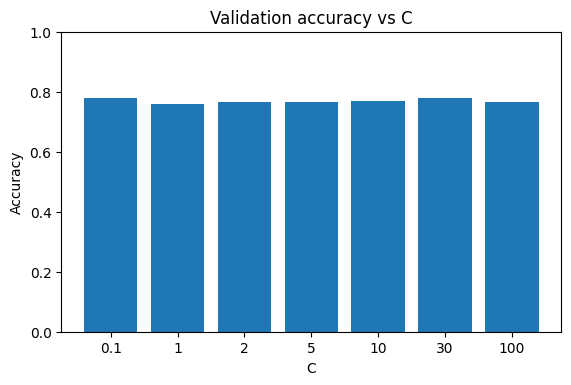

In [35]:
fig = plt.figure(figsize = (5, 3))
ax = fig.add_axes([0,0,1,1])
c_value = [str(C) for C in regularization]
ax.bar(c_value, accuracy)
ax.set_ylim(top=1)

ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_title('Validation accuracy vs C')

plt.show()

**Question 1(c)** (5 marks) Use Principal Component Analysis or PCA (number of components = 2) to transform the validation data into 2-D data points on a plane. Then use an SVM classifier to predict on the validation data valid_x. Plot the decision boundary and predictions. (You can use/edit the provided starter code for plotting; note that in the starter code for plotting, "svm_clf" was used for the SVM classifier, and "reduced_x" was used for the PCA-reduced data.)

In [45]:
pca = PCA(n_components=2)
pca.fit(valid_x)
reduced_x = pca.transform(valid_x)
svm_clf = SVC(kernel='rbf', gamma=2, C=10)
svm_clf.fit(reduced_x, valid_y)

SVC(C=10, gamma=2)

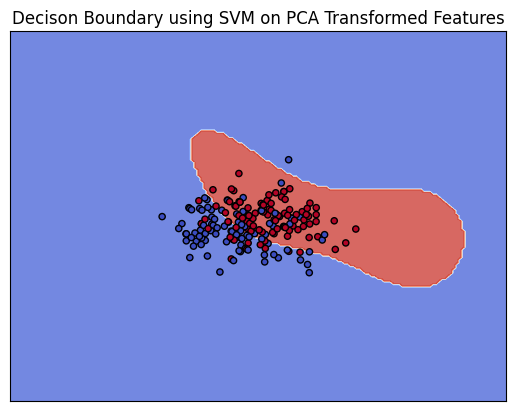

In [50]:
# Code for plot

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# Set up grid for plotting.
X0, X1 = reduced_x[:, 0], reduced_x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=valid_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison Boundary using SVM on PCA Transformed Features')
plt.show()